In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

df = pd.read_csv('data/employees4.csv', na_values=['\\N'], on_bad_lines='skip', infer_datetime_format=True, parse_dates=['Date_Joined', 'Date_Resigned', 'Inactive_Date'])
df.info()
print(f'Total employees {str(df["Employee_Code"].nunique())}')
print(f'Earliest join date {str(df["Date_Joined"].min())}')
print(f'Latest join date {str(df["Date_Joined"].max())}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Employee_No          1261 non-null   int64         
 1   Employee_Code        1261 non-null   int64         
 2   Name                 1261 non-null   object        
 3   Title                1261 non-null   object        
 4   Address_Line_1       1261 non-null   object        
 5   Address_Line_2       1181 non-null   object        
 6   Address_Line_3       952 non-null    object        
 7   Date_of_Birth        1261 non-null   object        
 8   Gender               1261 non-null   object        
 9   Religion_ID          1261 non-null   int64         
 10  Marital_Status       1170 non-null   object        
 11  Designation_ID       1261 non-null   int64         
 12  Date_Joined          1261 non-null   datetime64[ns]
 13  Date_Resigned        955 non-null

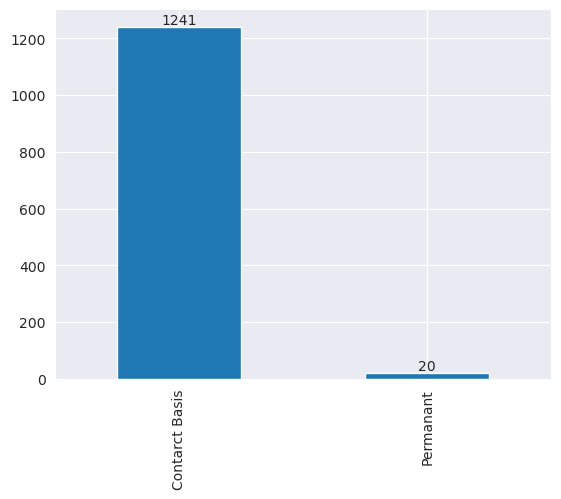

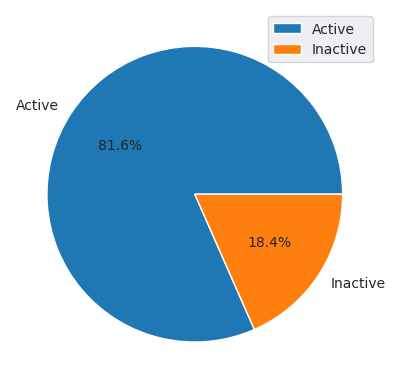

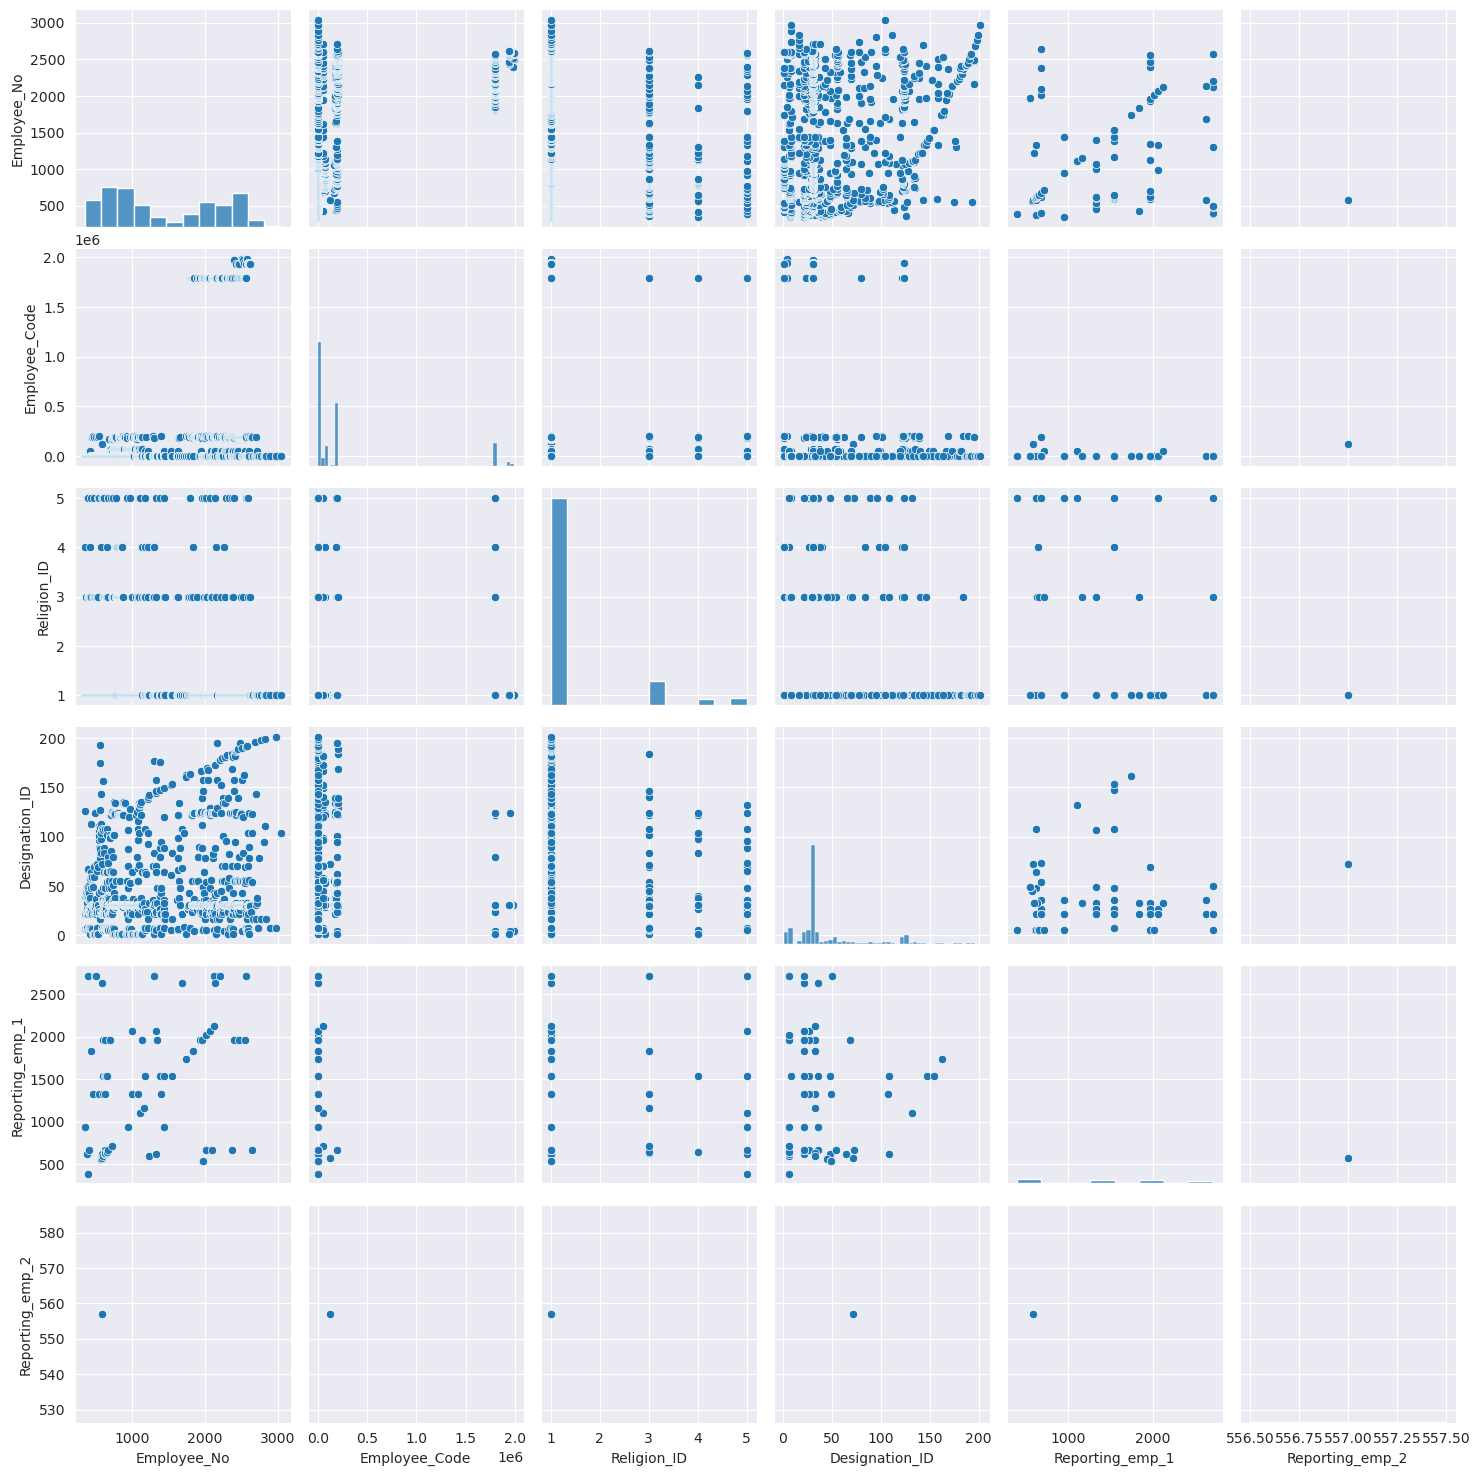

In [52]:
temp_plot = df['Employment_Type'].value_counts().plot(kind='bar')
temp_plot.bar_label(temp_plot.containers[0], labels=df['Employment_Type'].value_counts())
plt.show()

plt.pie(df['Status'].value_counts(), labels=df['Status'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

seaborn.pairplot(df)
#temp_plot = df['Designation'].value_counts().plot(kind='pie')
#plt.legend()
#plt.show()

In [53]:
df_inactive = df.loc[(df['Status'] == 'Inactive') & (df['Employment_Type'] == 'Contarct Basis')]
df_inactive['Date_Joined'] = pd.to_datetime(df_inactive['Date_Joined'])
df_inactive['Date_Resigned'] = pd.to_datetime(df_inactive['Date_Resigned'], errors='coerce')
df_inactive['Employment_Duration'] = df_inactive['Date_Resigned'] - df_inactive['Date_Joined']
df_inactive['Employment_Duration'].describe()

/tmp/ipykernel_8761/3509363569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inactive['Date_Joined'] = pd.to_datetime(df_inactive['Date_Joined'])
/tmp/ipykernel_8761/3509363569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inactive['Date_Resigned'] = pd.to_datetime(df_inactive['Date_Resigned'], errors='coerce')
/tmp/ipykernel_8761/3509363569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

count                            751
mean     408 days 12:14:22.849533956
std      468 days 17:30:17.438927584
min                  0 days 00:00:00
25%                108 days 12:00:00
50%                261 days 00:00:00
75%                556 days 00:00:00
max               3924 days 00:00:00
Name: Employment_Duration, dtype: object

In [54]:
df_inactive = df.loc[(df['Status'] == 'Inactive') & (df['Employment_Type'] == 'Permanant')]
df_inactive['Date_Joined'] = pd.to_datetime(df_inactive['Date_Joined'])
df_inactive['Date_Resigned'] = pd.to_datetime(df_inactive['Date_Resigned'], errors='coerce')
df_inactive['Employment_Duration'] = df_inactive['Date_Resigned'] - df_inactive['Date_Joined']
df_inactive['Employment_Duration'].describe()

/tmp/ipykernel_8761/1182723412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inactive['Date_Joined'] = pd.to_datetime(df_inactive['Date_Joined'])
/tmp/ipykernel_8761/1182723412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inactive['Date_Resigned'] = pd.to_datetime(df_inactive['Date_Resigned'], errors='coerce')
/tmp/ipykernel_8761/1182723412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

count                               7
mean     6432 days 20:34:17.142857152
std      3677 days 16:37:16.130469952
min                 257 days 00:00:00
25%                5237 days 12:00:00
50%                5693 days 00:00:00
75%                8199 days 12:00:00
max               12206 days 00:00:00
Name: Employment_Duration, dtype: object

In [55]:
df_inactive = df.loc[(df['Status'] == 'Inactive')]
df_inactive['Date_Joined'] = pd.to_datetime(df_inactive['Date_Joined'])
df_inactive['Date_Resigned'] = pd.to_datetime(df_inactive['Date_Resigned'], errors='coerce')
df_inactive['Employment_Duration'] = df_inactive['Date_Resigned'] - df_inactive['Date_Joined']
df_inactive['Employment_Duration'].describe()

/tmp/ipykernel_8761/3473634866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inactive['Date_Joined'] = pd.to_datetime(df_inactive['Date_Joined'])
/tmp/ipykernel_8761/3473634866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inactive['Date_Resigned'] = pd.to_datetime(df_inactive['Date_Resigned'], errors='coerce')
/tmp/ipykernel_8761/3473634866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

count                            758
mean     464 days 03:27:04.274406336
std      810 days 18:56:38.163449840
min                  0 days 00:00:00
25%                109 days 12:00:00
50%                263 days 00:00:00
75%                565 days 00:00:00
max              12206 days 00:00:00
Name: Employment_Duration, dtype: object